# Cell 1: Importing Libraries and Setting Up Data
## Explanation
This cell imports the necessary libraries and sets up the data for analysis. 
It generates a dataset with a combination of normal and outlier income values, 
assigns random weights, and creates a DataFrame. Additionally, it calculates the mode, mean, and median of the income data.

In [130]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Define data size
data_size = 1000

# Generate normal data (90% of the data)
normal_data = np.random.normal(loc=50, scale=15, size=int(data_size * 0.9))

# Generate outlier data (10% of the data)
outliers = np.random.normal(loc=120, scale=10, size=int(data_size * 0.1))

# Combine the normal data and outliers
combined_data = np.concatenate([normal_data, outliers])

# Generate weights for the weighted mean analysis
weights = np.random.uniform(0.5, 2.0, size=data_size)

# Create a DataFrame
df = pd.DataFrame({
    'Income (thousands)': combined_data,
    'Weights': weights,
    'Category': ['Income'] * data_size
})

# Calculate mode, mean, and median (without weights)
mode_income = df['Income (thousands)'].mode()[0]
mean_income = df['Income (thousands)'].mean()
median_income = df['Income (thousands)'].median()

# Display the first few rows of the DataFrame and basic statistics
df_statistics = {
    'Mode': mode_income,
    'Mean': mean_income,
    'Median': median_income,
}

df.head(), df_statistics


(   Income (thousands)   Weights Category
 0           57.450712  0.751224   Income
 1           47.926035  0.656852   Income
 2           59.715328  1.454645   Income
 3           72.845448  1.559714   Income
 4           46.487699  0.547379   Income,
 {'Mode': np.float64(1.380989898963911),
  'Mean': np.float64(57.276053924891436),
  'Median': np.float64(52.25521660953564)})

# Cell 2: Normality Check with Q-Q Plot
## Explanation
In this cell, we create a histogram combined with a kernel density estimate (KDE) 
to visually assess the distribution of the income data. 
The histogram displays the frequency of income values, and the KDE line estimates the probability density function. 
Vertical lines indicate the mean, median, and mode, allowing for quick visual comparison.
This visualization helps determine if the income distribution resembles a normal distribution.

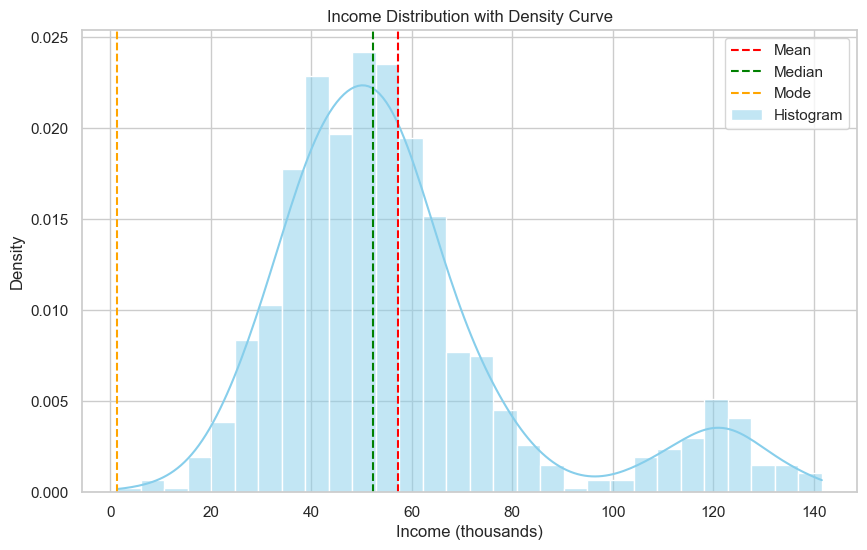

In [131]:
# Create a histogram to check for normality
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.histplot(df['Income (thousands)'], kde=True, stat='density', color='skyblue', bins=30, label='Histogram')
plt.axvline(mean_income, color='red', linestyle='--', label='Mean')
plt.axvline(median_income, color='green', linestyle='--', label='Median')
plt.axvline(mode_income, color='orange', linestyle='--', label='Mode')

# Add title and labels
plt.title('Income Distribution with Density Curve')
plt.xlabel('Income (thousands)')
plt.ylabel('Density')
plt.legend()
plt.show()


# Cell 3: Box Plot of Income Distribution without Weighting or Trimming
## Explanation
This cell creates a box plot to visualize the income distribution without applying any weighting or trimming. 
It includes lines indicating the mode, mean, and median values, as well as a legend explaining the outliers.

/var/folders/kc/fprg47md0p36ch019m6frj0w0000gn/T/ipykernel_3115/1681421357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot_normal = sns.boxplot(y='Income (thousands)', data=df, palette="Set2",


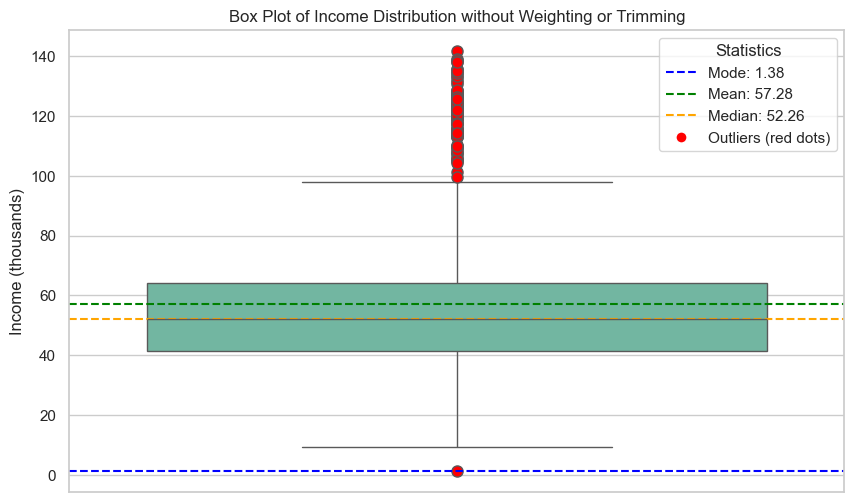

In [135]:
# Create a box plot of income distribution without weighting or trimming
plt.figure(figsize=(10, 6))
box_plot_normal = sns.boxplot(y='Income (thousands)', data=df, palette="Set2", 
                               flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})

# Add lines for mode, mean, and median
plt.axhline(mode_income, color='blue', linestyle='--', label=f'Mode: {mode_income:.2f}')
plt.axhline(mean_income, color='green', linestyle='--', label=f'Mean: {mean_income:.2f}')
plt.axhline(median_income, color='orange', linestyle='--', label=f'Median: {median_income:.2f}')

# Add labels and title
plt.title('Box Plot of Income Distribution without Weighting or Trimming')
plt.ylabel('Income (thousands)')

# Add legend for statistics and outliers
handles, labels = box_plot_normal.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Outliers (red dots)'))
plt.legend(handles=handles, title='Statistics', loc='upper right')

# Show the plot
plt.show()


# Cell 4: Box Plot of Income Distribution with Weights Applied
## Explanation
This cell generates a box plot for the income distribution with weights applied. 
It calculates and displays the weighted mean along with the median, providing insights into the impact of weighting on the data visualization.

/var/folders/kc/fprg47md0p36ch019m6frj0w0000gn/T/ipykernel_3115/3494327439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot_weighted = sns.boxplot(y='Income (thousands)', data=df_weighted, palette="Set2",


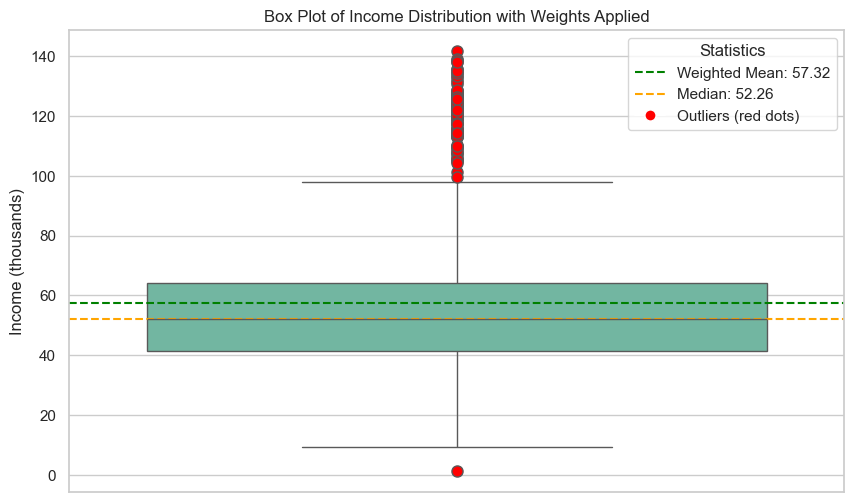

In [136]:
# Create a box plot of income distribution with weights applied
df_weighted = df.copy()
weighted_mean_income = (df_weighted['Income (thousands)'] * df_weighted['Weights']).sum() / df_weighted['Weights'].sum()

plt.figure(figsize=(10, 6))
box_plot_weighted = sns.boxplot(y='Income (thousands)', data=df_weighted, palette="Set2", 
                                 flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})

# Add lines for weighted mean, median, and original mean
plt.axhline(weighted_mean_income, color='green', linestyle='--', label=f'Weighted Mean: {weighted_mean_income:.2f}')
plt.axhline(median_income, color='orange', linestyle='--', label=f'Median: {median_income:.2f}')

# Add labels and title
plt.title('Box Plot of Income Distribution with Weights Applied')
plt.ylabel('Income (thousands)')

# Add legend for statistics and outliers
handles, labels = box_plot_weighted.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Outliers (red dots)'))
plt.legend(handles=handles, title='Statistics', loc='upper right')

# Show the plot
plt.show()


# Cell 5: Box Plot of Income Distribution with Median and MAD
## Explanation
This cell creates a box plot displaying the median and the median absolute deviation (MAD) of the income data. 
MAD is a robust statistical measure that quantifies the dispersion of a dataset by calculating the median of the absolute deviations from the median.
This plot highlights the presence and effect of outliers on the income distribution.

/var/folders/kc/fprg47md0p36ch019m6frj0w0000gn/T/ipykernel_3115/1698866182.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot_mad = sns.boxplot(y='Income (thousands)', data=df_MAD, palette="Set2",


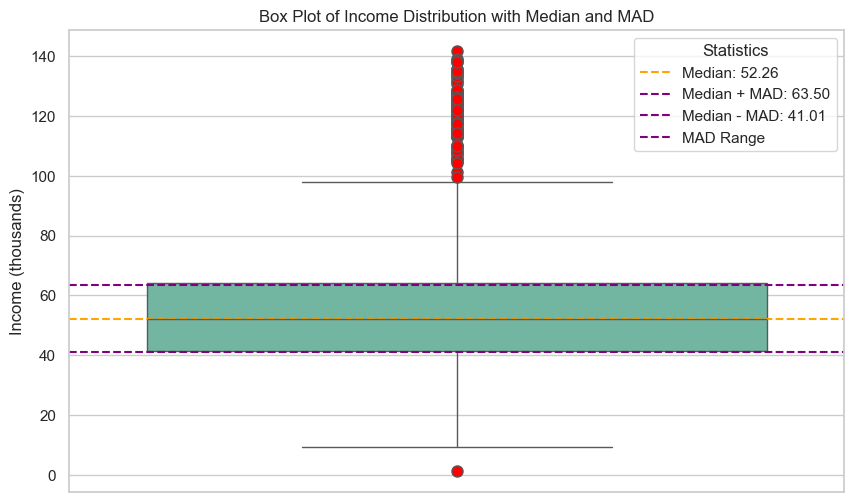

In [137]:
# Create a box plot with median and MAD
df_MAD = df.copy()
median_income = df_MAD['Income (thousands)'].median()
mad = np.median(np.abs(df_MAD['Income (thousands)'] - median_income))

plt.figure(figsize=(10, 6))
box_plot_mad = sns.boxplot(y='Income (thousands)', data=df_MAD, palette="Set2", 
                           flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})

# Add lines for median and MAD
plt.axhline(median_income, color='orange', linestyle='--', label=f'Median: {median_income:.2f}')
plt.axhline(median_income + mad, color='purple', linestyle='--', label=f'Median + MAD: {median_income + mad:.2f}')
plt.axhline(median_income - mad, color='purple', linestyle='--', label=f'Median - MAD: {median_income - mad:.2f}')

# Add labels and title
plt.title('Box Plot of Income Distribution with Median and MAD')
plt.ylabel('Income (thousands)')

# Add legend for statistics and outliers
handles, labels = box_plot_mad.get_legend_handles_labels()
plt.legend(handles=handles + [plt.Line2D([0], [0], color='purple', linestyle='--', label='MAD Range')], 
                               title='Statistics', loc='upper right')

# Show the plot
plt.show()


# Cell 6: Box Plot of Trimmed Income Distribution
## Explanation
This cell applies a 5% trimming to the income data, creating a box plot of the trimmed distribution. 
It includes lines indicating the 5th and 95th percentiles, providing clarity on the trimming effect on the dataset.

/var/folders/kc/fprg47md0p36ch019m6frj0w0000gn/T/ipykernel_3115/3445137256.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot_trimmed = sns.boxplot(y=trimmed_data, palette="Set2",


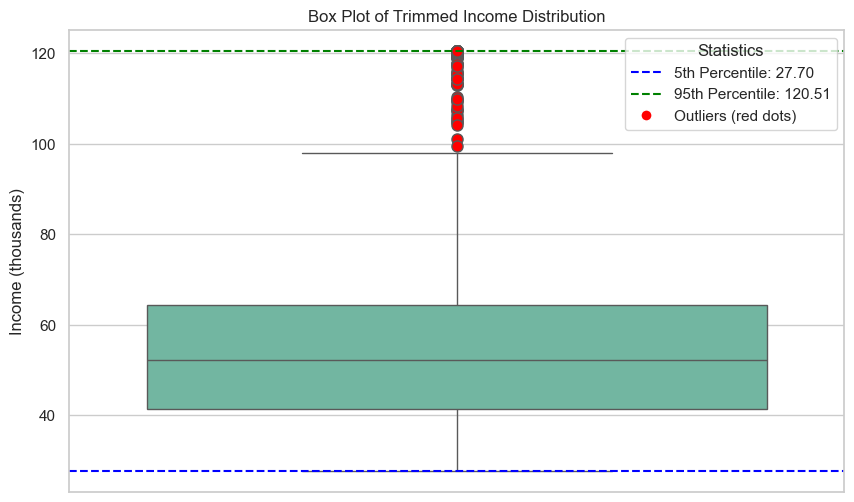

In [138]:
df_trimmed = df.copy()

# Apply trimming to remove extreme values (5% trimming)
lower_quantile = df_trimmed['Income (thousands)'].quantile(0.05)  # 5th percentile
upper_quantile = df_trimmed['Income (thousands)'].quantile(0.95)  # 95th percentile
trimmed_data = df_trimmed['Income (thousands)'].clip(lower=lower_quantile, upper=upper_quantile)

# Create a box plot of the trimmed data
plt.figure(figsize=(10, 6))
box_plot_trimmed = sns.boxplot(y=trimmed_data, palette="Set2", 
                               flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})

# Add lines for percentiles
plt.axhline(lower_quantile, color='blue', linestyle='--', label=f'5th Percentile: {lower_quantile:.2f}')
plt.axhline(upper_quantile, color='green', linestyle='--', label=f'95th Percentile: {upper_quantile:.2f}')

# Add labels and title
plt.title('Box Plot of Trimmed Income Distribution')
plt.ylabel('Income (thousands)')

# Add legend for percentiles and outliers
handles, labels = box_plot_trimmed.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Outliers (red dots)'))
plt.legend(handles=handles, title='Statistics', loc='upper right')

# Show the plot
plt.show()


# Cell 7: Clustering the Income Data
## Explanation
In this cell, we apply K-Means clustering to the income data. 
We choose 3 clusters for simplicity and visualize the cluster assignments by adding a new column to the DataFrame. 
This will help us analyze the different groups within the income data.

In [139]:
from sklearn.cluster import KMeans

# Reshape data for clustering
income_data = df_trimmed['Income (thousands)'].values.reshape(-1, 1)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_trimmed['Cluster'] = kmeans.fit_predict(income_data)

# Display the first few rows of the updated DataFrame
df_trimmed.head(10)


,Income (thousands),Weights,Category,Cluster
0,57.450712,0.751224,Income,1
1,47.926035,0.656852,Income,2
2,59.715328,1.454645,Income,1
3,72.845448,1.559714,Income,1
4,46.487699,0.547379,Income,2
5,46.487946,1.904318,Income,2
6,73.688192,0.577957,Income,1
7,61.511521,1.311945,Income,1
8,42.957884,1.563591,Income,2
9,58.138401,1.806454,Income,1


# Cell 8: Histogram of Clusters
## Explanation
This cell generates a histogram to visualize the distribution of income data across the different clusters identified by K-Means. 
Each cluster is represented with a different color, providing insights into the income distribution and how it varies among the clusters.

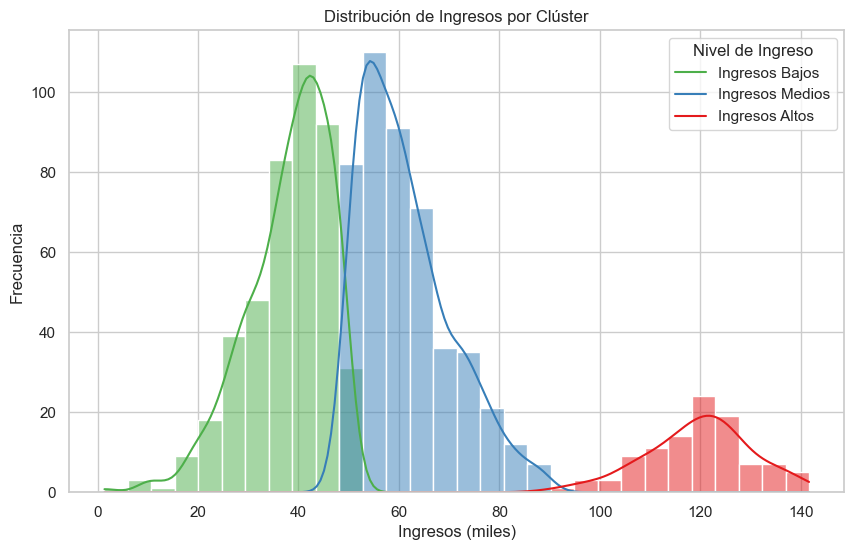

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los labels ajustados para los niveles de ingreso
labels_income = ['Ingresos Bajos', 'Ingresos Medios', 'Ingresos Altos']

# Crear el histograma de datos de ingresos por clúster
plt.figure(figsize=(10, 6))

# Agregar parámetro `hue` para segmentar por clúster
sns.histplot(data=df_trimmed, x='Income (thousands)', hue='Cluster', bins=30, palette='Set1', kde=True)

# Agregar título y etiquetas
plt.title('Distribución de Ingresos por Clúster')
plt.xlabel('Ingresos (miles)')
plt.ylabel('Frecuencia')

# Agregar la leyenda directamente con etiquetas personalizadas
plt.legend(title='Nivel de Ingreso', loc='upper right', labels=labels_income)

# Mostrar el gráfico
plt.show()


# Cell 9: Clean Clusters to Achieve Uniform Histogram
## Explanation
In this cell, we remove outliers from each cluster based on the IQR (Interquartile Range) method. 
This helps to achieve a more uniform distribution in the histogram.

In [147]:
# Function to remove outliers based on IQR
def remove_outliers(df):
    clean_df = pd.DataFrame()
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        Q1 = cluster_data['Income (thousands)'].quantile(0.25)
        Q3 = cluster_data['Income (thousands)'].quantile(0.75)
        IQR = Q3 - Q1
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter data
        clean_cluster_data = cluster_data[(cluster_data['Income (thousands)'] >= lower_bound) & 
                                           (cluster_data['Income (thousands)'] <= upper_bound)]
        clean_df = pd.concat([clean_df, clean_cluster_data])
    return clean_df

# Clean the data
cleaned_df = remove_outliers(df_trimmed)

# Display the first few rows of the cleaned DataFrame
cleaned_df.head()


,Income (thousands),Weights,Category,Cluster
0,57.450712,0.751224,Income,1
2,59.715328,1.454645,Income,1
3,72.845448,1.559714,Income,1
6,73.688192,0.577957,Income,1
7,61.511521,1.311945,Income,1


# Cell 10: Uniform Histogram of Cleaned Clusters
## Explanation
This cell generates a histogram of the cleaned income data, removing outliers to achieve a more uniform distribution.

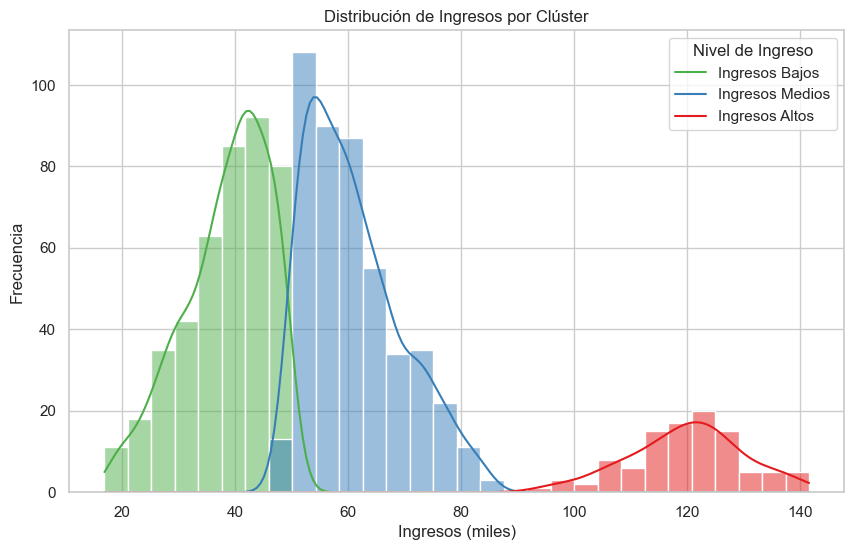

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los labels ajustados para los niveles de ingreso
labels_income = ['Ingresos Bajos', 'Ingresos Medios', 'Ingresos Altos']

# Crear el histograma de datos de ingresos por clúster
plt.figure(figsize=(10, 6))

# Definir una paleta personalizada para asegurar que los colores sean consistentes
custom_palette = {0: sns.color_palette('Set1')[0], 1: sns.color_palette('Set1')[1], 2: sns.color_palette('Set1')[2]}

# Agregar parámetro `hue` para segmentar por clúster con la paleta personalizada
sns.histplot(data=cleaned_df, x='Income (thousands)', hue='Cluster', bins=30, palette=custom_palette, kde=True)

# Agregar título y etiquetas
plt.title('Distribución de Ingresos por Clúster')
plt.xlabel('Ingresos (miles)')
plt.ylabel('Frecuencia')

# Agregar la leyenda directamente con etiquetas personalizadas
plt.legend(title='Nivel de Ingreso', loc='upper right', labels=labels_income)

# Mostrar el gráfico
plt.show()


# Cell 11: Box Plot of Income by Cluster
## Explanation
In this cell, we create box plots for each cluster to visualize the distribution of income and identify the median and outliers.

/var/folders/kc/fprg47md0p36ch019m6frj0w0000gn/T/ipykernel_3115/119352982.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, x='Cluster', y='Income (thousands)', palette=custom_palette, order=['2', '1', '0'])


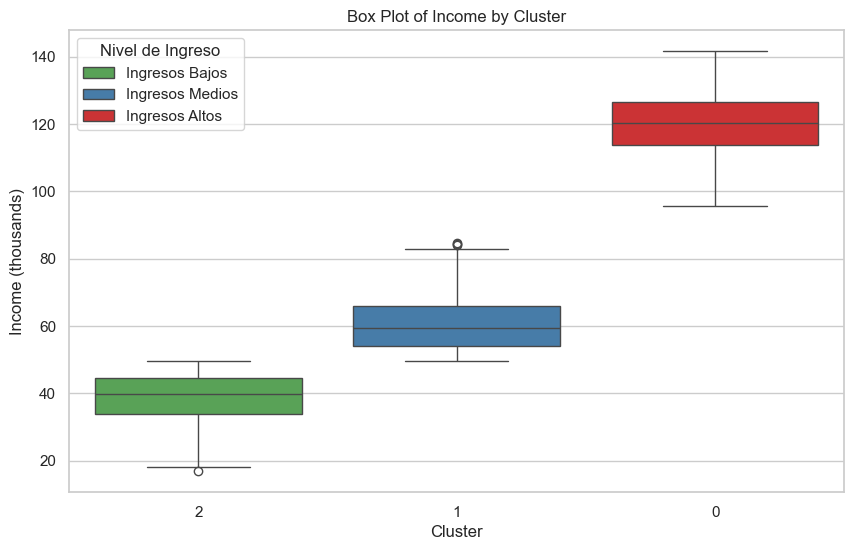

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los labels ajustados para los niveles de ingreso
labels_income = ['Ingresos Bajos', 'Ingresos Medios', 'Ingresos Altos']

# Crear el box plot de ingresos por clúster
plt.figure(figsize=(10, 6))

# Asegurarse de que las claves de la paleta coincidan con los valores de los clústeres
custom_palette = {'2': sns.color_palette('Set1')[2], '1': sns.color_palette('Set1')[1], '0': sns.color_palette('Set1')[0]}

# Cambiar el orden de los clústeres: 'Ingresos Altos' a la izquierda, 'Bajos Ingresos' a la derecha
sns.boxplot(data=cleaned_df, x='Cluster', y='Income (thousands)', palette=custom_palette, order=['2', '1', '0'])

# Agregar título y etiquetas
plt.title('Box Plot of Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income (thousands)')

# Crear la leyenda manualmente con etiquetas personalizadas
plt.legend(title='Nivel de Ingreso', labels=labels_income, loc='upper left')

# Mostrar el gráfico
plt.show()


# Cell 12: DataFrames by Cluster
## Explanation
In this section, we will create separate DataFrames for each cluster. This allows us to inspect the data points within each cluster, helping us to understand the characteristics of each group more clearly.

In [181]:
# Create DataFrames for each cluster
cluster_dataframes = {cluster: cleaned_df[cleaned_df['Cluster'] == cluster] for cluster in cleaned_df['Cluster'].unique()}

# Display the DataFrames
for cluster, data in cluster_dataframes.items():
    print(f"Cluster {cluster}:")
    display(data)  # Use display() if you're in a Jupyter environment
    print("\n")


Cluster 1:


,Income (thousands),Weights,Category,Cluster
0,57.450712,0.751224,Income,1
2,59.715328,1.454645,Income,1
3,72.845448,1.559714,Income,1
6,73.688192,0.577957,Income,1
7,61.511521,1.311945,Income,1
...,...,...,...,...
893,67.539434,1.497477,Income,1
894,70.732385,0.890430,Income,1
895,59.730648,1.860793,Income,1
897,52.200705,1.340661,Income,1




Cluster 2:


,Income (thousands),Weights,Category,Cluster
1,47.926035,0.656852,Income,2
4,46.487699,0.547379,Income,2
5,46.487946,1.904318,Income,2
8,42.957884,1.563591,Income,2
10,43.048735,1.571130,Income,2
...,...,...,...,...
881,42.036968,1.464323,Income,2
882,42.658408,1.541226,Income,2
887,44.610619,0.955920,Income,2
896,47.493229,1.506098,Income,2




Cluster 0:


,Income (thousands),Weights,Category,Cluster
209,107.790972,1.098234,Income,0
478,96.183212,1.680355,Income,0
900,123.686733,1.190537,Income,0
901,116.066612,1.796845,Income,0
902,120.287448,1.319972,Income,0
...,...,...,...,...
995,117.188997,0.921025,Income,0
996,137.976865,0.810489,Income,0
997,126.408429,1.274859,Income,0
998,114.288210,0.508259,Income,0


In [182]:
stats = cleaned_df.groupby('Cluster')['Income (thousands)'].describe()
display(stats)


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,102.0,119.919882,9.957052,95.761207,113.677373,120.375907,126.422528,141.632547
1,458.0,60.888147,8.422846,49.508701,53.938310,59.318615,65.955746,84.719879
2,426.0,38.477777,7.601859,16.832970,33.778597,39.844372,44.415712,49.503095


/var/folders/kc/fprg47md0p36ch019m6frj0w0000gn/T/ipykernel_3115/3946649594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cleaned_df, x='Cluster', y='Income (thousands)', palette='Set1')


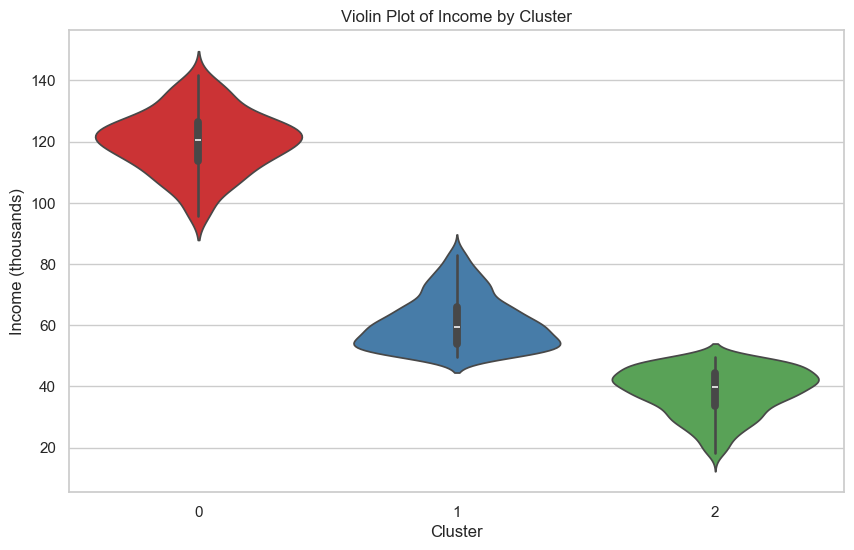

In [183]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=cleaned_df, x='Cluster', y='Income (thousands)', palette='Set1')
plt.title('Violin Plot of Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income (thousands)')
plt.show()


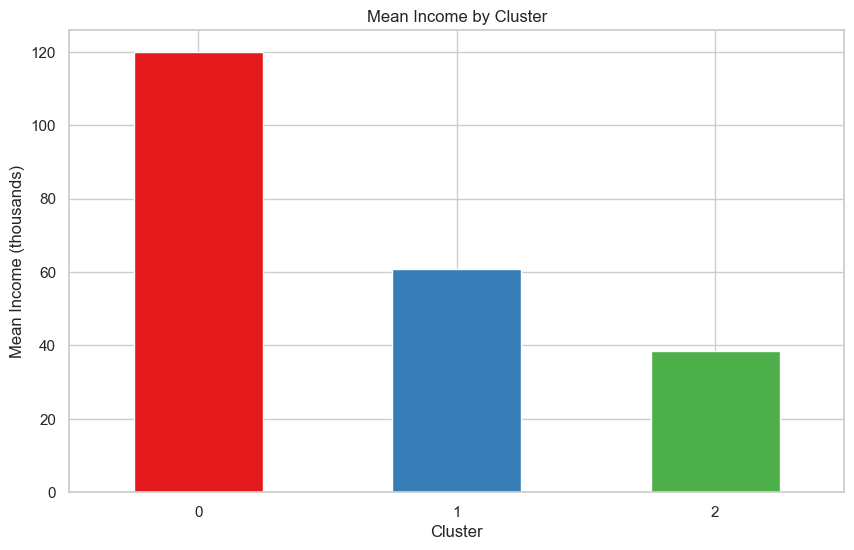

In [184]:
# Calcula la media de ingresos por cluster
mean_values = cleaned_df.groupby('Cluster')['Income (thousands)'].mean()

# Define los colores de la paleta
palette = sns.color_palette('Set1', n_colors=len(mean_values))

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color=palette)
plt.title('Mean Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Income (thousands)')
plt.xticks(rotation=0)  # Opcional: para que las etiquetas del eje x estén en horizontal
plt.show()


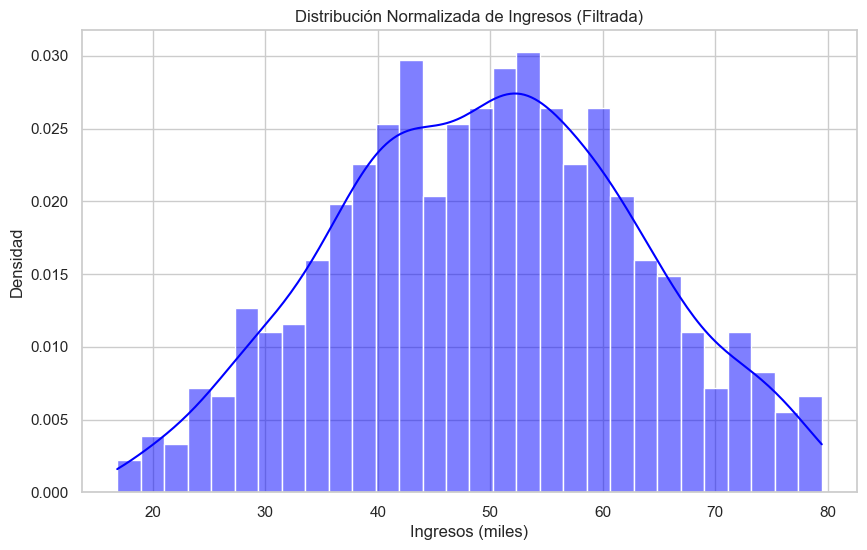

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para excluir los ingresos más altos (por ejemplo, ingresos mayores a 80 miles)
filtered_df = cleaned_df[cleaned_df['Income (thousands)'] <= 80]

# Crear el histograma normalizado de los datos filtrados
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='Income (thousands)', bins=30, kde=True, stat='density', color='blue')

# Agregar título y etiquetas
plt.title('Distribución Normalizada de Ingresos (Filtrada)')
plt.xlabel('Ingresos (miles)')
plt.ylabel('Densidad')

plt.show()


In [191]:
import numpy as np
import statsmodels.api as sm

# Preparar los datos para la regresión lineal
X = filtered_df['Income (thousands)']
y = filtered_df['Weights']  # Suponiendo que 'Weights' es la variable dependiente

# Agregar una constante para el término independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                Weights   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.979
Date:                Sun, 22 Sep 2024   Prob (F-statistic):              0.160
Time:                        17:34:22   Log-Likelihood:                -504.93
No. Observations:                 871   AIC:                             1014.
Df Residuals:                     869   BIC:                             1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1799      0

/var/folders/kc/fprg47md0p36ch019m6frj0w0000gn/T/ipykernel_3115/210960778.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster_DBSCAN'] = clusters


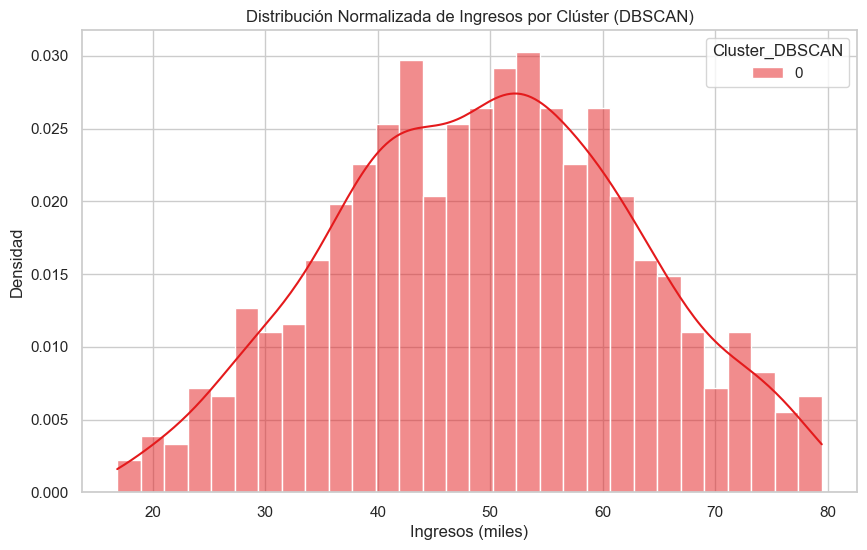

In [192]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos (usando solo la columna de ingresos para simplicidad)
X = filtered_df[['Income (thousands)']].values

# Aplicar DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Agregar los clústeres al DataFrame
filtered_df['Cluster_DBSCAN'] = clusters

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='Income (thousands)', hue='Cluster_DBSCAN', bins=30, palette='Set1', kde=True, stat='density')

# Agregar título y etiquetas
plt.title('Distribución Normalizada de Ingresos por Clúster (DBSCAN)')
plt.xlabel('Ingresos (miles)')
plt.ylabel('Densidad')

plt.show()


In [194]:
# Descripción estadística del clúster identificado
cluster_stats = filtered_df[filtered_df['Cluster_DBSCAN'] == 0]['Income (thousands)'].describe()
print(cluster_stats)


count    871.000000
mean      49.606740
std       13.306879
min       16.832970
25%       40.224227
50%       49.816298
75%       59.225767
max       79.470877
Name: Income (thousands), dtype: float64


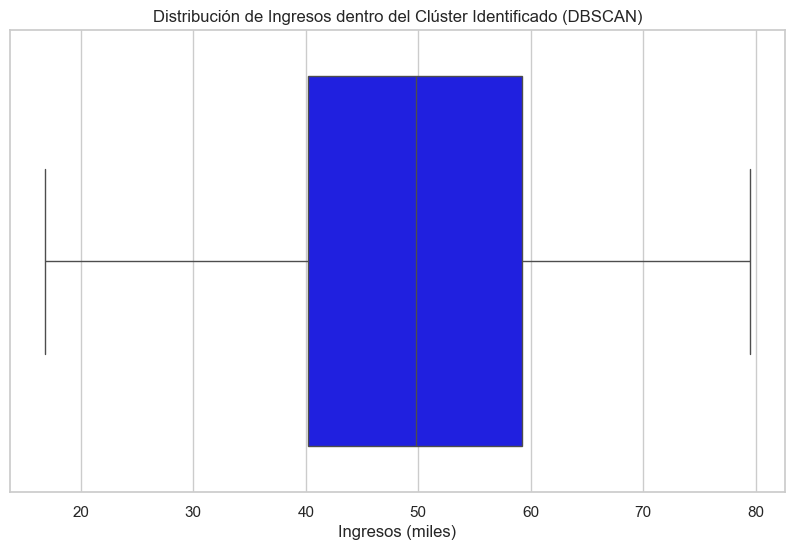

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un box plot para visualizar la distribución de ingresos dentro del clúster
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df[filtered_df['Cluster_DBSCAN'] == 0], x='Income (thousands)', color='blue')

# Agregar título y etiquetas
plt.title('Distribución de Ingresos dentro del Clúster Identificado (DBSCAN)')
plt.xlabel('Ingresos (miles)')
plt.show()


In [196]:
import statsmodels.api as sm

# Preparar los datos para la regresión lineal dentro del clúster identificado
cluster_data = filtered_df[filtered_df['Cluster_DBSCAN'] == 0]
X = cluster_data[['Income (thousands)']]
y = cluster_data['Weights']

# Agregar una constante para el término independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                Weights   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.979
Date:                Sun, 22 Sep 2024   Prob (F-statistic):              0.160
Time:                        17:40:52   Log-Likelihood:                -504.93
No. Observations:                 871   AIC:                             1014.
Df Residuals:                     869   BIC:                             1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1799      0

Regresión Polinómica

In [197]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preparar los datos
X = filtered_df[['Income (thousands)']]
y = filtered_df['Weights']

# Transformar los datos para incluir términos polinómicos
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Ajustar el modelo de regresión polinómica
model = LinearRegression()
model.fit(X_poly, y)

# Predicciones y evaluación del modelo
y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# Coeficientes del modelo
print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')


Mean Squared Error: 0.18638161668881367
Coeficientes: [ 0.00000000e+00  9.31564150e-03 -7.83917096e-05]
Intercepto: 1.0014208627605765


Visualización del Modelo Polinómico

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


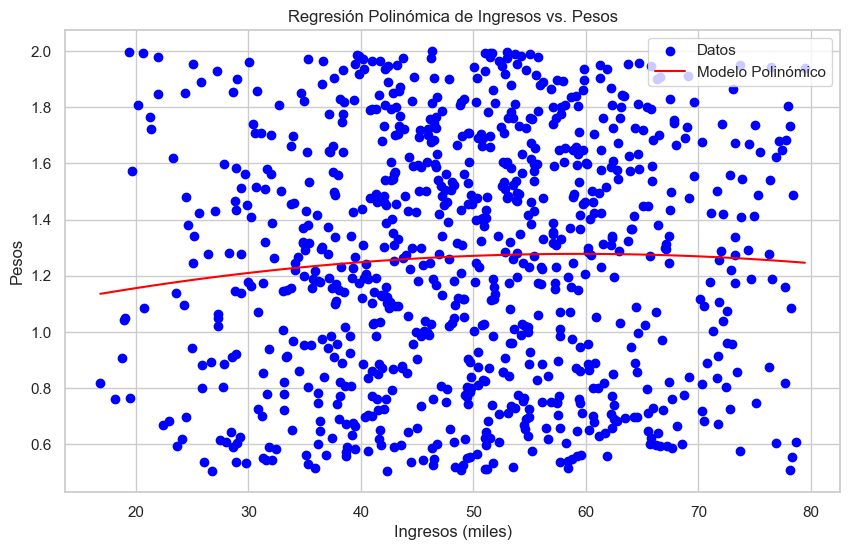

In [198]:
import numpy as np
import matplotlib.pyplot as plt

# Preparar los datos para la visualización
X_range = np.linspace(X.min(), X.max(), 100)
X_range_poly = poly.transform(X_range.reshape(-1, 1))
y_range_pred = model.predict(X_range_poly)

# Graficar los datos y la curva de regresión polinómica
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X_range, y_range_pred, color='red', label='Modelo Polinómico')
plt.title('Regresión Polinómica de Ingresos vs. Pesos')
plt.xlabel('Ingresos (miles)')
plt.ylabel('Pesos')
plt.legend()
plt.show()


Análisis de Residuos

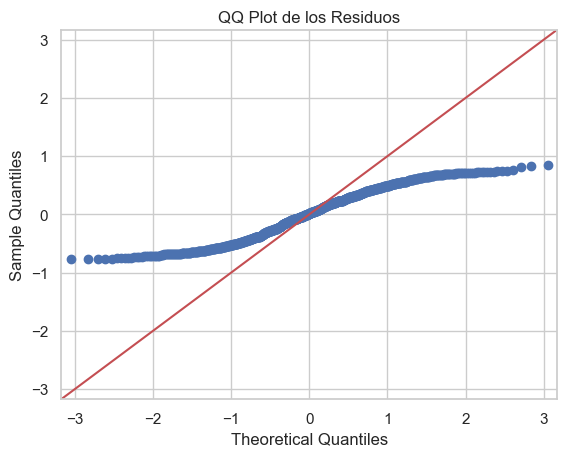

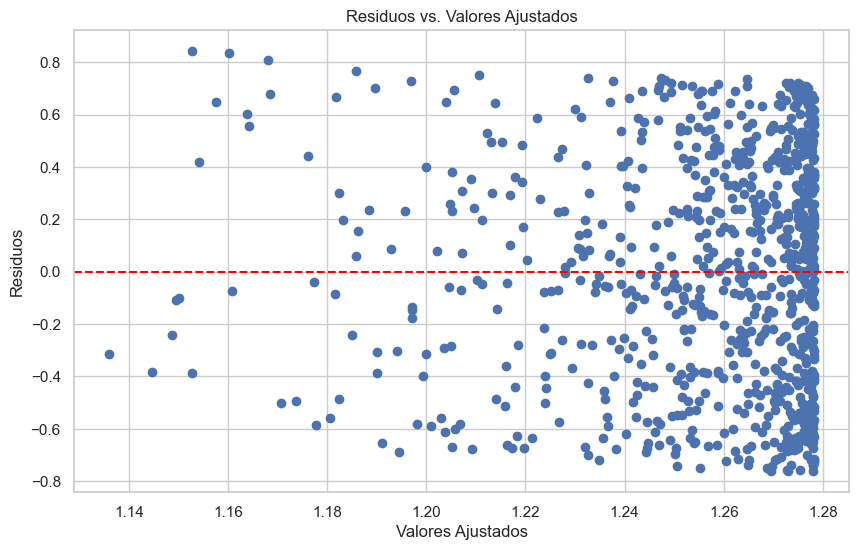

In [199]:
import statsmodels.api as sm

# Graficar los residuos
residuals = y - y_pred
sm.qqplot(residuals, line='45')
plt.title('QQ Plot de los Residuos')
plt.show()

# Graficar los residuos vs. los valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()
